<a href="https://colab.research.google.com/github/imceballos/gephi_manifestacioneschile/blob/main/Tesis_limpio_1_limpio_paratrabajar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_mainf = pd.read_excel('movilizaciones_2018.xlsx')

In [3]:
df_mainf.head()

,Unnamed: 0,id_organizacion,id_manifestacion
0,0,0,0
1,1,1,0
2,2,2,1
3,3,3,2
4,4,4,3


In [4]:
import networkx as nx
from networkx.algorithms import bipartite, average_clustering

In [5]:
B = nx.Graph()

In [6]:
top_nodes = [f"o{x}" for x in range(9253)]
bottom_nodes = [x for x in range(18416)]

In [7]:
B.add_nodes_from(top_nodes, bipartite=0)
B.add_nodes_from(bottom_nodes, bipartite=1)

In [8]:
func1 = lambda x: "o"+str(x)
df_mainf['id_organizacion'] = df_mainf['id_organizacion'].apply(func1)
relations = list(df_mainf[['id_organizacion','id_manifestacion']].apply(tuple, axis=1))
B.add_edges_from(relations)

In [9]:
G = bipartite.generic_weighted_projected_graph(B, top_nodes)

In [10]:
edges = G.edges(data=True)

Información relativa al grafo bipartito

In [11]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 9253\nNumber of edges: 7050\nAverage degree:   1.5238'

In [12]:
import matplotlib.pyplot as plt


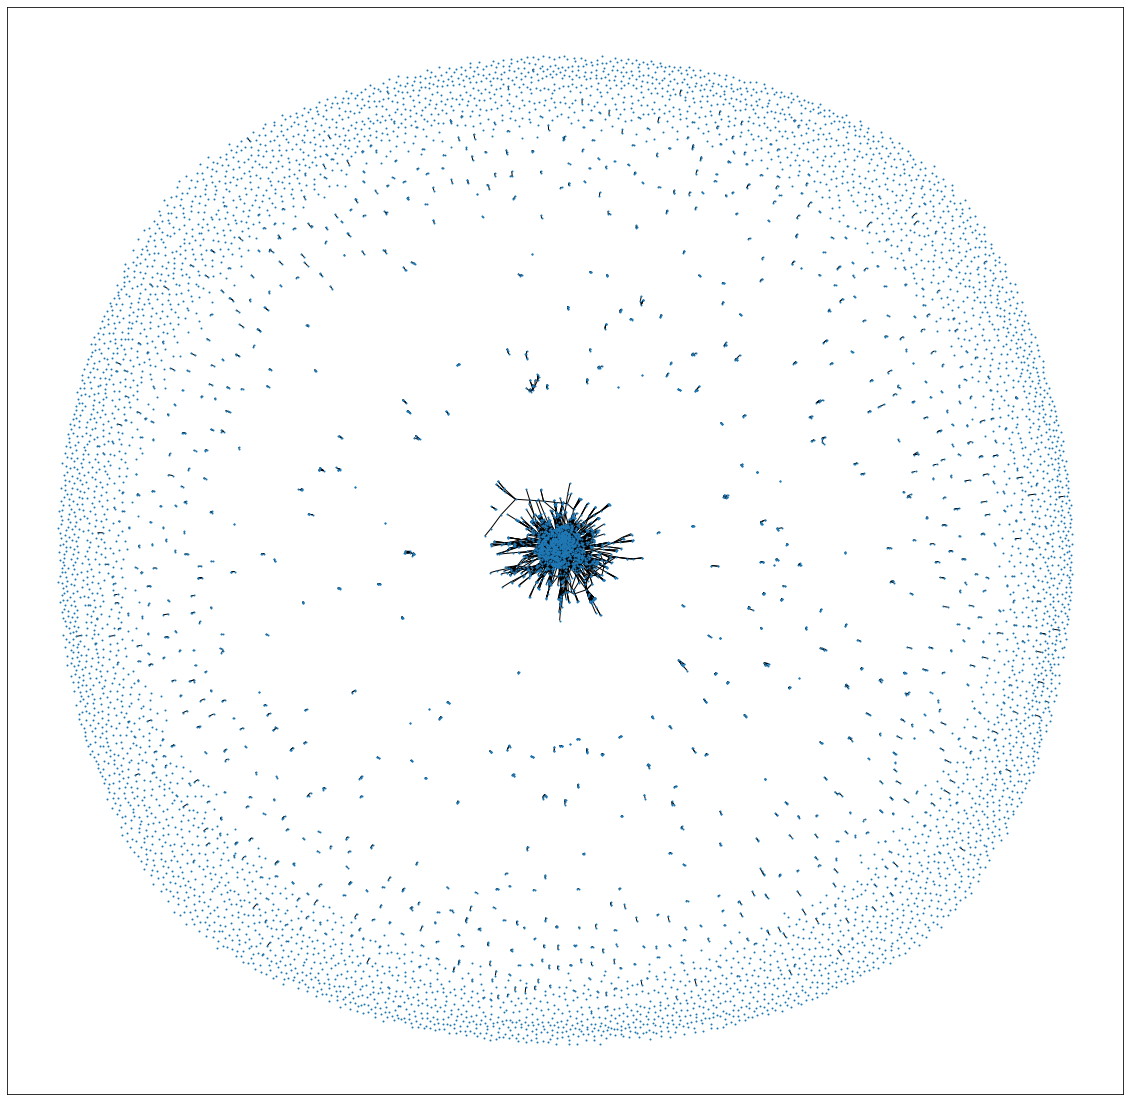

In [ ]:
sp = nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw_networkx(G,pos=sp, with_labels=False, node_size= 1)
plt.show()

Información relativa a la componente conexa más grande del Grafo

In [13]:
Gcc = max(nx.connected_components(G), key=len)
giant_C = G.subgraph(Gcc)

In [14]:
nx.info(giant_C)

'Name: \nType: Graph\nNumber of nodes: 1936\nNumber of edges: 4818\nAverage degree:   4.9773'

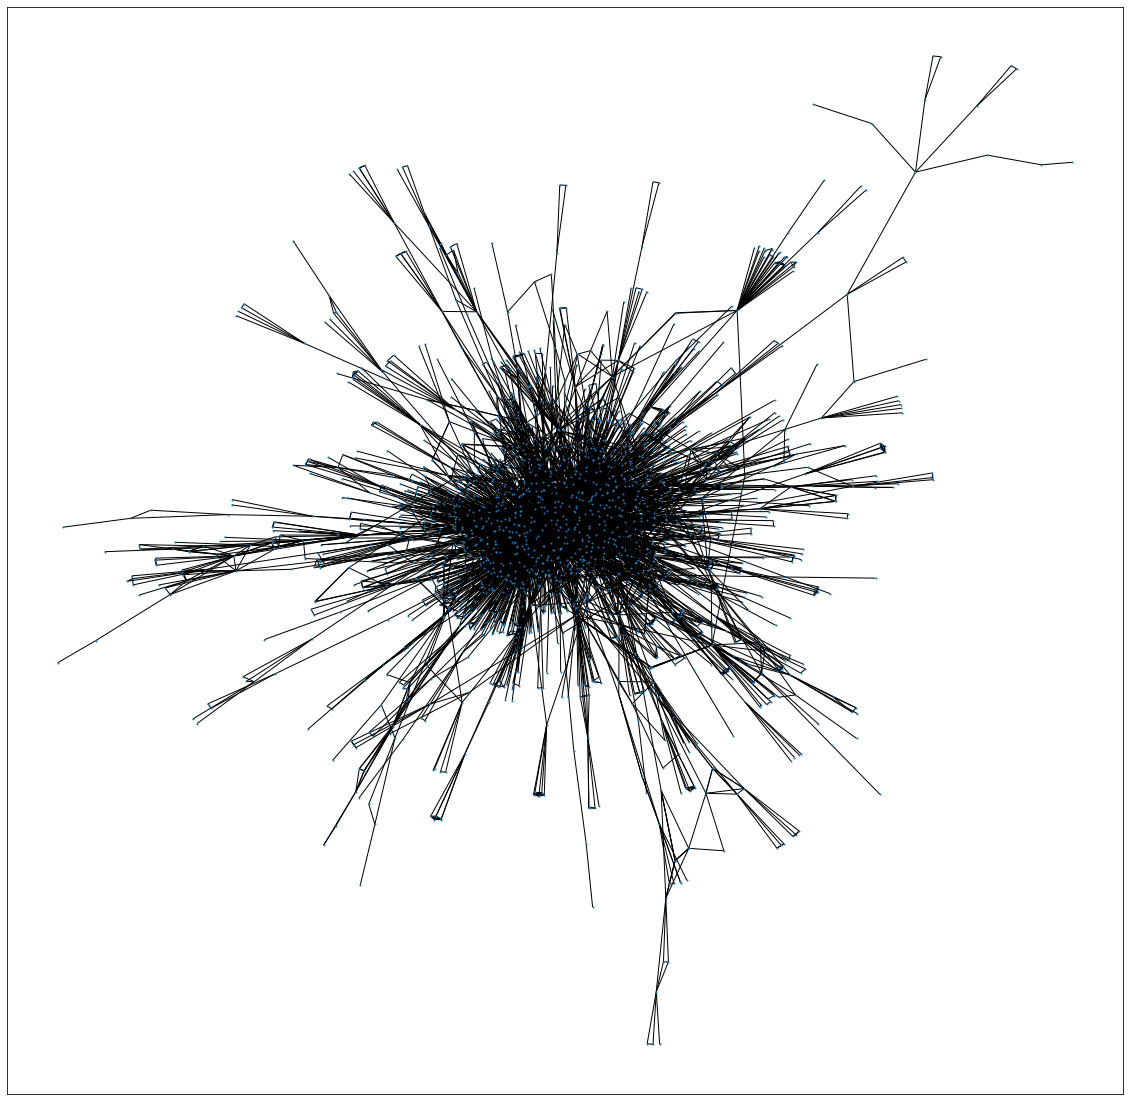

In [ ]:
sp = nx.spring_layout(giant_C)
plt.figure(figsize=(20,20))
nx.draw_networkx(giant_C,pos=sp, with_labels=False, node_size= 1)
plt.show()

Proceso de conteo de frecuencias por grado de cada nodo

In [15]:
from collections import Counter

In [16]:
degree_dict = dict(G.degree(G.nodes()))
values_to_plot = dict(Counter(list(degree_dict.values())))
x_freq = list(values_to_plot.keys())
y_freq = list(values_to_plot.values())







Top 10 grados



In [17]:
from operator import itemgetter

degrees_sorted = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
degrees_sorted[:10]

[('o96', 370),
 ('o67', 369),
 ('o79', 307),
 ('o263', 233),
 ('o84', 91),
 ('o338', 91),
 ('o4190', 89),
 ('o110', 81),
 ('o1032', 76),
 ('o15', 73)]

Top 10 grados componente principal


In [18]:
degree_dict_comp_principal = dict(giant_C.degree(giant_C.nodes()))
degrees_sorted_cp = sorted(degree_dict_comp_principal.items(), key=itemgetter(1), reverse=True)
degrees_sorted_cp[:10]


[('o96', 370),
 ('o67', 369),
 ('o79', 307),
 ('o263', 233),
 ('o84', 91),
 ('o338', 91),
 ('o4190', 89),
 ('o110', 81),
 ('o1032', 76),
 ('o15', 73)]

Grado vs Frequencia  **Grafo Total**



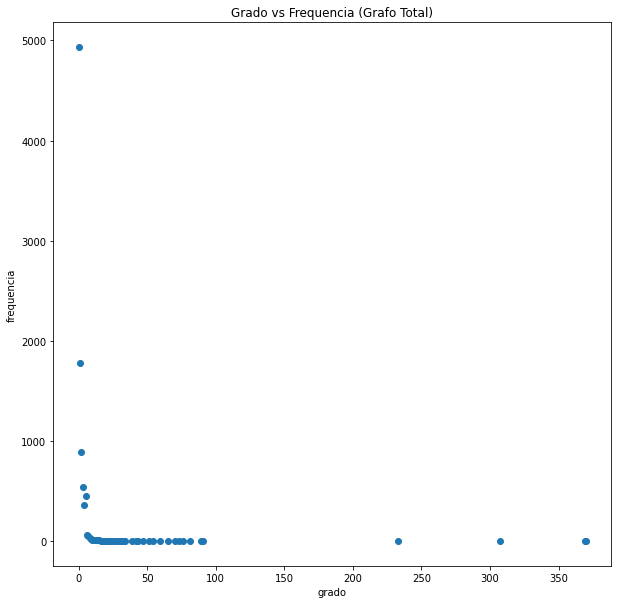

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Grado vs Frequencia (Grafo Total)")
plt.xlabel("grado")
plt.ylabel("frequencia")
plt.scatter(x_freq, y_freq)
plt.show()

Grado vs Frequencia Log Log **Grafo Total**

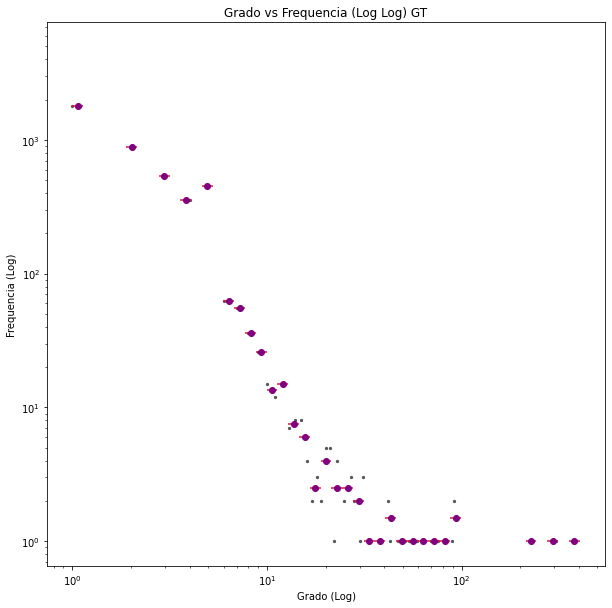

In [20]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_freq,y_freq, s=5, color='#555555')

s, edges, _ = binned_statistic(x_freq,y_freq, statistic='mean', bins=np.logspace(0,np.exp(1)))

ax.hlines(s,edges[:-1],edges[1:], color="crimson", )


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Grado vs Frequencia (Log Log) GT")
plt.xlabel("Grado (Log)")
plt.ylabel("Frequencia (Log)")
plt.show()

Grafico de Frequencias/(Suma Frequencias) vs Grado Log Log **Grafo Total**


In [21]:
y_freq_normalizado = [d/sum(y_freq) for d in y_freq]

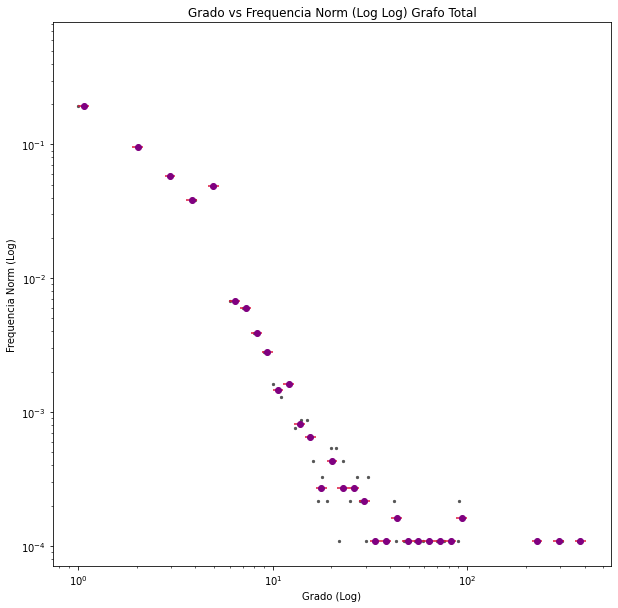

In [22]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_freq,y_freq_normalizado, s=5, color='#555555')

s, edges, _ = binned_statistic(x_freq,y_freq_normalizado, statistic='mean', bins=np.logspace(0,np.exp(1)))

ax.hlines(s,edges[:-1],edges[1:], color="crimson", )


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Grado vs Frequencia Norm (Log Log) Grafo Total")
plt.xlabel("Grado (Log)")
plt.ylabel("Frequencia Norm (Log)")
plt.show()

Grafico de grado vs freq/prob generado desde un histograma

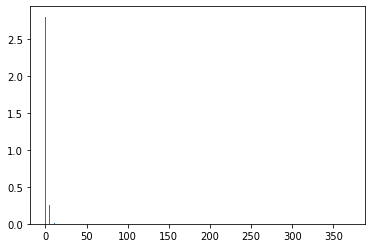

In [23]:
values_hist = plt.hist(degree_dict.values(),bins='auto', density=True)
final_values_hist = []
for i in range(len(list(values_hist[0]))):
  final_values_hist.append((list(values_hist[1])[i],list(values_hist[0])[i]))

In [24]:
x_hist = [val[0] for val in final_values_hist]
y_hist = [val[1] for val in final_values_hist]

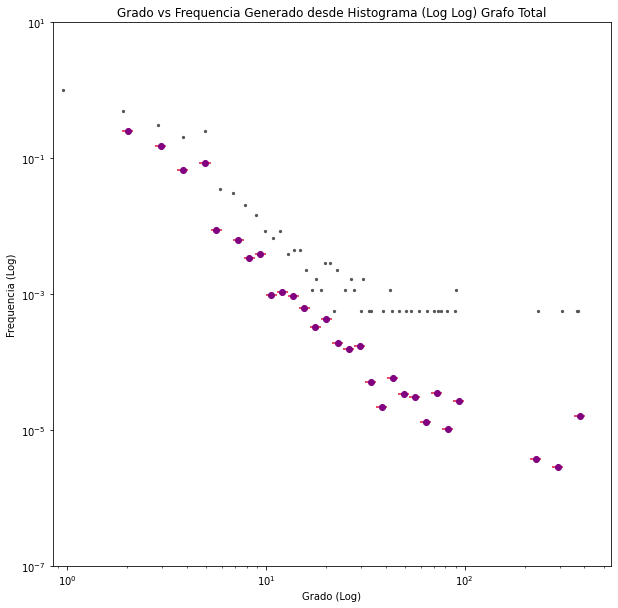

In [25]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_hist,y_hist, s=5, color='#555555')

s, edges, _ = binned_statistic(x_hist,y_hist, statistic='mean', bins=np.logspace(0,np.exp(1)))

ax.hlines(s,edges[:-1],edges[1:], color="crimson", )


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_yscale("log")
ax.set_xscale("log")

plt.title("Grado vs Frequencia Generado desde Histograma (Log Log) Grafo Total")
plt.xlabel("Grado (Log)")
plt.ylabel("Frequencia (Log)")
plt.ylim(bottom=0.0000001, top=10)

plt.show()

Grafico grado vs neighboord grado

In [26]:
from statistics import mean

x_values_gt_degrees = []
y_values_gt_degrees = []

for value in G.nodes():
  neighboor = G.neighbors(value)
  x_values_gt_degrees.append(G.degree(value))
  total_vals = []
  for nodo in neighboor:
    total_vals.append(G.degree(nodo))
    y_values_gt_degrees.append(mean(total_vals))

Grafico de clustering vs grado

In [27]:
x_avg = []
y_avg = []
avg_clustering_dict = {}
for node in G.nodes():
  try:
    val = average_clustering(G, G[node])
    avg_clustering_dict[node] = val
    degree = G.degree(node)
    x_avg.append(degree)
    y_avg.append(val)
  except:
    pass

In [28]:
avg_clustering_sorted = sorted(avg_clustering_dict.items(), key=itemgetter(1), reverse=True)
avg_clustering_sorted[:1000]

[('o41', 1.0),
 ('o42', 1.0),
 ('o43', 1.0),
 ('o115', 1.0),
 ('o118', 1.0),
 ('o119', 1.0),
 ('o120', 1.0),
 ('o326', 1.0),
 ('o335', 1.0),
 ('o336', 1.0),
 ('o337', 1.0),
 ('o379', 1.0),
 ('o466', 1.0),
 ('o467', 1.0),
 ('o468', 1.0),
 ('o559', 1.0),
 ('o560', 1.0),
 ('o561', 1.0),
 ('o565', 1.0),
 ('o606', 1.0),
 ('o607', 1.0),
 ('o608', 1.0),
 ('o620', 1.0),
 ('o621', 1.0),
 ('o622', 1.0),
 ('o655', 1.0),
 ('o656', 1.0),
 ('o657', 1.0),
 ('o687', 1.0),
 ('o688', 1.0),
 ('o689', 1.0),
 ('o690', 1.0),
 ('o702', 1.0),
 ('o703', 1.0),
 ('o704', 1.0),
 ('o705', 1.0),
 ('o706', 1.0),
 ('o707', 1.0),
 ('o711', 1.0),
 ('o712', 1.0),
 ('o713', 1.0),
 ('o717', 1.0),
 ('o718', 1.0),
 ('o719', 1.0),
 ('o732', 1.0),
 ('o760', 1.0),
 ('o761', 1.0),
 ('o762', 1.0),
 ('o787', 1.0),
 ('o788', 1.0),
 ('o789', 1.0),
 ('o820', 1.0),
 ('o843', 1.0),
 ('o879', 1.0),
 ('o880', 1.0),
 ('o895', 1.0),
 ('o896', 1.0),
 ('o900', 1.0),
 ('o901', 1.0),
 ('o936', 1.0),
 ('o956', 1.0),
 ('o957', 1.0),
 ('o958', 1

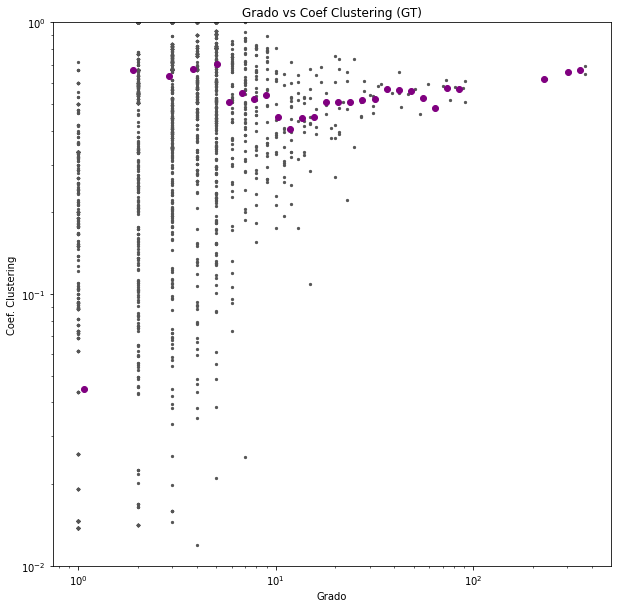

In [29]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_avg,y_avg, s=5, color='#555555')

s, edges, _ = binned_statistic(x_avg,y_avg, statistic='mean', bins=np.logspace(0,3,50))


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Grado vs Coef Clustering (GT)")
plt.xlabel("Grado")
plt.ylabel("Coef. Clustering")
plt.ylim(bottom=0.01, top=1)

plt.show()

Grado vs Eigenvector centrality Grafo Total

In [30]:
eigenvector_dict = nx.eigenvector_centrality(G) 

In [31]:
list_grados_orgtotal1 = []
for value in eigenvector_dict.keys():
  list_grados_orgtotal1.append(G.degree(value))

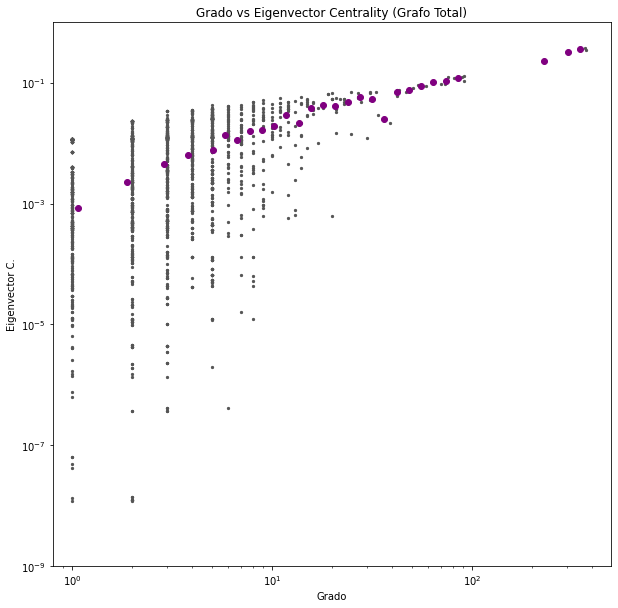

In [32]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(list_grados_orgtotal1, list(eigenvector_dict.values()), s=5, color='#555555')


s, edges, _ = binned_statistic(list_grados_orgtotal1, list(eigenvector_dict.values()), statistic='mean', bins=np.logspace(0,3,50))


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Grado vs Eigenvector Centrality (Grafo Total)")
plt.xlabel("Grado")
plt.ylabel("Eigenvector C.")
plt.ylim(bottom=0.000000001, top=1)

plt.show()

Grado vs Betweenness Centrality

In [33]:
betweeness_dict = nx.betweenness_centrality(G) 

In [34]:
list_grados_orgtotal = []
for value in betweeness_dict.keys():
  list_grados_orgtotal.append(G.degree(value))

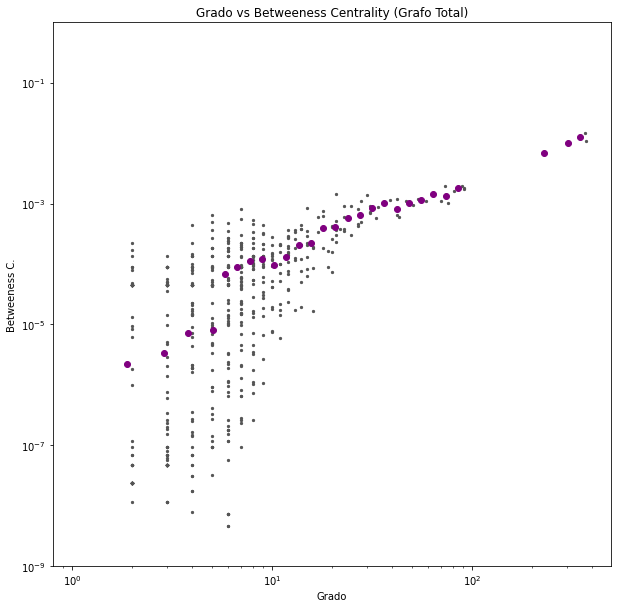

In [35]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(list_grados_orgtotal, list(betweeness_dict.values()), s=5, color='#555555')


s, edges, _ = binned_statistic(list_grados_orgtotal, list(betweeness_dict.values()), statistic='mean', bins=np.logspace(0,3,50))


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Grado vs Betweeness Centrality (Grafo Total)")
plt.xlabel("Grado")
plt.ylabel("Betweeness C.")
plt.ylim(bottom=0.000000001, top=1)

plt.show()

Correlación entre el grado y el Betweenness

In [36]:
from scipy.stats import pearsonr, spearmanr

coef_pearson = pearsonr(list_grados_orgtotal, list(betweeness_dict.values()))[0]
coef_spearman = spearmanr(list_grados_orgtotal, list(betweeness_dict.values()))[0]

f"El coef. de Pearson es: {coef_pearson}"

'El coef. de Pearson es: 0.953179133193874'

In [37]:
f"El coef. de Spearman es: {coef_spearman}"

'El coef. de Spearman es: 0.4118181351095729'

Betweeness vs Eigenvector Centrality

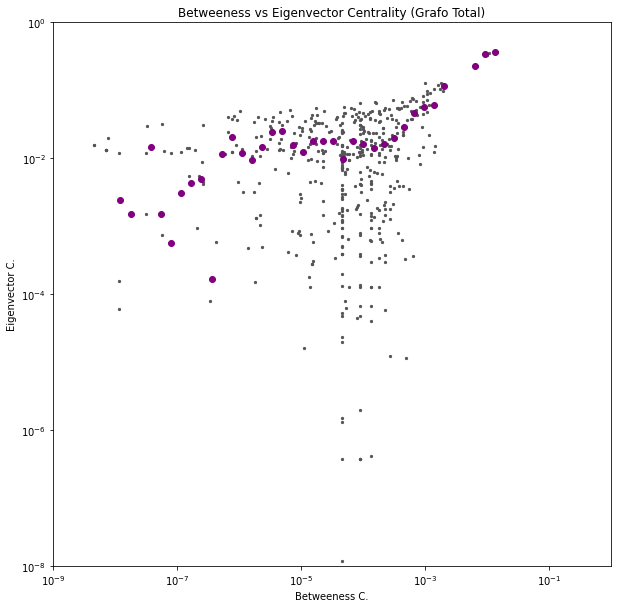

In [38]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(list(betweeness_dict.values()), list(eigenvector_dict.values()), s=5, color='#555555')


s, edges, _ = binned_statistic(list(betweeness_dict.values()), list(eigenvector_dict.values()), statistic='mean',bins=np.logspace(-8,0,50))


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Betweeness vs Eigenvector Centrality (Grafo Total)")
plt.xlabel("Betweeness C.")
plt.ylabel("Eigenvector C.")

plt.xlim(0.000000001,1)
plt.ylim(bottom=0.00000001, top=1)

plt.show()

Correlación entre Betweenness Coef. y Eigenvector

In [39]:
from scipy.stats import pearsonr, spearmanr

coef_pearson = pearsonr(list(betweeness_dict.values()), list(eigenvector_dict.values()))[0]
coef_spearman = spearmanr(list(betweeness_dict.values()), list(eigenvector_dict.values()))[0]

f"El coef. de Pearson es: {coef_pearson}"


'El coef. de Pearson es: 0.7609995200650607'

In [40]:
f"El coef. de Spearman es: {coef_spearman}"

'El coef. de Spearman es: 0.37703657548274955'

Rich club coef. vs Grado

In [41]:
import itertools

def phi_rich_club(G, k):
  E = 0
  list_nodes = []
  for nodes in G.nodes():
    if G.degree[nodes] >= k:
      list_nodes.append(nodes)
  all_combinations = list(itertools.combinations(list_nodes,2))
  for comb in all_combinations:
    E += G.number_of_edges(comb[0],comb[1])
  #for comb in all_combinations:
  #  E += G.get_edge_data(comb[0],comb[1])['weight']
  return 2*E/(len(list_nodes)*(len(list_nodes)-1))

In [42]:
degrees = []
rich_clubs = []
nodes = G.nodes()
for node in nodes:
  degree = G.degree(node)
  if degree not in degrees:
    degrees.append(degree)


for val in degrees:
  try:
    rc = phi_rich_club(G, val)
    rich_clubs.append(rc)
  except:
    rich_clubs.append(0)
    pass

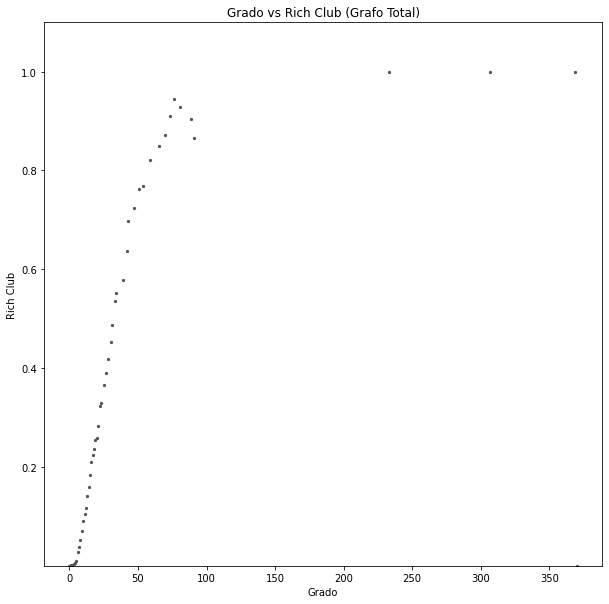

In [43]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(degrees, rich_clubs, s=5, color='#555555')

plt.title("Grado vs Rich Club (Grafo Total)")
plt.xlabel("Grado")
plt.ylabel("Rich Club")

plt.ylim(bottom=0.00000001, top=1.1)

plt.show()

Rich club normalizado, en GT

In [ ]:
from networkx.generators.degree_seq import random_degree_sequence_graph

In [44]:
list_of_degrees_GT = []
for value in list(G.degree()):
  list_of_degrees_GT.append(value[1])

In [45]:
!pip install python-igraph

In [46]:
from igraph import Graph


GT_random = Graph.Realize_Degree_Sequence(list_of_degrees_GT)
adj_gcprandom = list(GT_random.get_adjacency())
adj_gcprandom = np.array(adj_gcprandom)
G_generated = nx.from_numpy_matrix(adj_gcprandom, create_using=nx.MultiGraph)


In [47]:
list_of_values_generated_richclub_GT = []

degrees_generate = []
rich_clubs_generate = []

nodes = G_generated.nodes()
for node in nodes:
  degree = G_generated.degree(node)
  if degree not in degrees_generate:
    degrees_generate.append(degree)


for val in degrees_generate:
  try:
    rc = phi_rich_club(G_generated, val)
    rich_clubs_generate.append(rc)
  except:
    rich_clubs_generate.append(0)
    pass




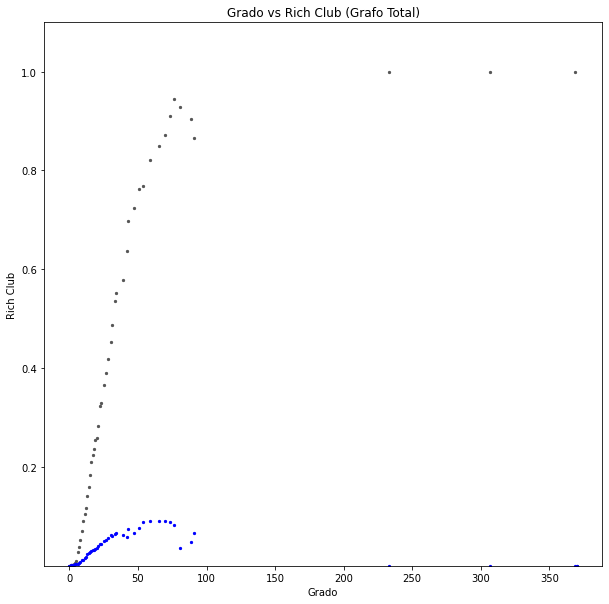

In [48]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(degrees, rich_clubs, s=5, color='#555555')
ax.scatter(degrees_generate, rich_clubs_generate, s=5, color='blue')

plt.title("Grado vs Rich Club (Grafo Total)")
plt.xlabel("Grado")
plt.ylabel("Rich Club")

plt.ylim(bottom=0.00000001, top=1.1)

plt.show()

Calculo correlaciones phi

In [49]:
import numpy as np

In [50]:
Adj_G = np.array(nx.to_numpy_matrix(G))

In [51]:
coo = Adj_G-np.diag(Adj_G.diagonal())

In [52]:
n = Adj_G.shape[0]

In [53]:
M = sum(coo) 
T = sum(M) 

phi = np.zeros((n,n)) 
M = sum(coo) # total number of obervations of each organization (suma sobre las filas)
T = sum(M) # Total number of observations
phi = np.zeros((n,n)) #matrix to store the phi correlations
for i in range(n):
    for j in range(n):
        p1 = T*coo[i,j]-M[i]*M[j]
        p2 = np.sqrt(M[i]*M[j]*(T-M[i])*(T-M[j]))
        if p2 == 0:
            phi[i,j] = 0
        else:
            phi[i,j] = p1/p2

In [56]:
phi

array([[-4.20266169e-04,  3.33271089e-01, -9.91526475e-04, ...,
        -1.40062564e-04,  0.00000000e+00,  0.00000000e+00],
       [ 3.33271089e-01, -4.66788032e-05, -3.30447108e-04, ...,
        -4.66788032e-05,  0.00000000e+00,  0.00000000e+00],
       [-9.91526475e-04, -3.30447108e-04, -2.33929073e-03, ...,
        -3.30447108e-04,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.40062564e-04, -4.66788032e-05, -3.30447108e-04, ...,
        -4.66788032e-05,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [59]:
max(phi[1,:])

0.33327108911761244

In [60]:
phi.shape

(9253, 9253)

In [54]:
np.save("phi_corr.npy", phi)

In [ ]:
import seaborn as sb
# matrix of of phi correlations
sb.heatmap(phi, figsize=(20,20))

plt.show()

In [57]:
gs=sb.displot(phi.flatten(),kind="kde")

KeyboardInterrupt: ignored

Bridging Coeficient

In [ ]:
def bridging_coef(node, G):
  den = 0
  if G.degree(node)!=0:
    num = 1/G.degree(node)
    neighbors = G.neighbors(node)
  else:
    return 0

  for nodo in neighbors:
    den += 1/G.degree(nodo)
  return num/den

In [ ]:
max(betweeness_dict.values())

0.01453021972246015

In [ ]:
list_grados_bc = []
list_bridging_coef = []

for node in G.nodes():
  list_grados_bc.append(G.degree(node))
  list_bridging_coef.append(bridging_coef(node, G))

Grado vs Bridging Coeficient 


Grafica de la comparación entre el grado y el Bridging Coef, este coef. luego sera usado para el calculo del Bridging Centrality.

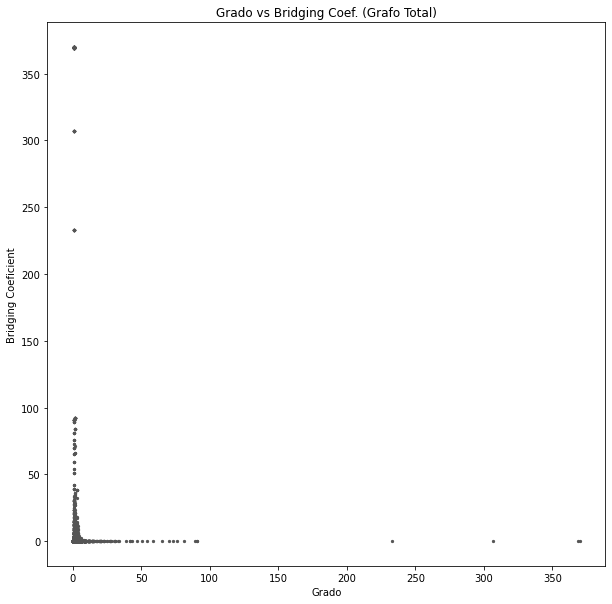

In [ ]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(list_grados_bc, list_bridging_coef, s=5, color='#555555')

plt.title("Grado vs Bridging Coef. (Grafo Total)")
plt.xlabel("Grado")
plt.ylabel("Bridging Coeficient")

plt.show()

Calculo del Bridging Centrality

In [ ]:
list_grados_bc1 = []
list_bridging_cent = []

for node in G.nodes():
  list_grados_bc1.append(G.degree(node))
  bridg_centrality = bridging_coef(node, G)*betweeness_dict[node]
  list_bridging_cent.append(bridg_centrality)

Grado vs Bridging Centrality

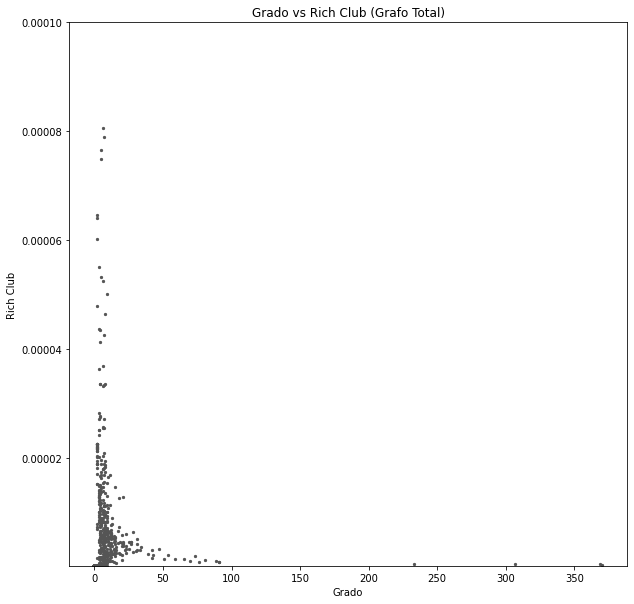

In [ ]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(list_grados_bc1, list_bridging_cent, s=5, color='#555555')

plt.title("Grado vs Rich Club (Grafo Total)")
plt.xlabel("Grado")
plt.ylabel("Rich Club")

plt.ylim(bottom=0.0000001, top=0.0001)

plt.show()

Repetimos los pasos anteriores para la componente principal

In [ ]:
degree_dict_p = dict(giant_C.degree(giant_C.nodes()))
values_to_plot_p = dict(Counter(list(degree_dict_p.values())))
x_freq_p = list(values_to_plot_p.keys())
y_freq_p = list(values_to_plot_p.values())

Grado vs Frequencia Componente Principal

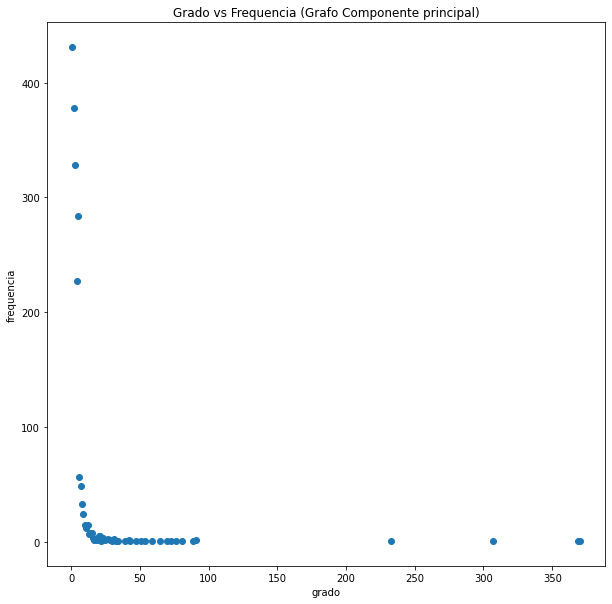

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Grado vs Frequencia (Grafo Componente principal)")
plt.xlabel("grado")
plt.ylabel("frequencia")
plt.scatter(x_freq_p, y_freq_p)
plt.show()

Grado vs Frequencia Log Log Componente Principal 

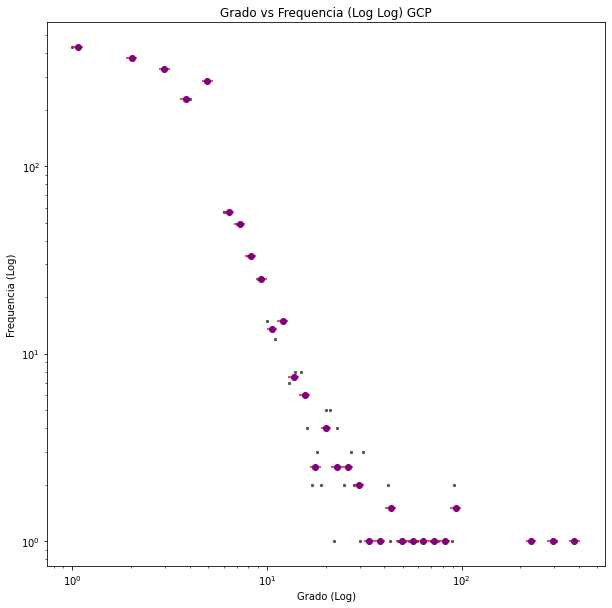

In [ ]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_freq_p,y_freq_p, s=5, color='#555555')

s, edges, _ = binned_statistic(x_freq_p,y_freq_p, statistic='mean', bins=np.logspace(0,np.exp(1)))

ax.hlines(s,edges[:-1],edges[1:], color="crimson", )


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Grado vs Frequencia (Log Log) GCP")
plt.xlabel("Grado (Log)")
plt.ylabel("Frequencia (Log)")
plt.show()

Grafico de Frequencias/(Suma Frequencias) vs Grado **Grafo Componente Principal**


In [ ]:
y_freq_normalizado_p = [d/sum(y_freq_p) for d in y_freq_p]

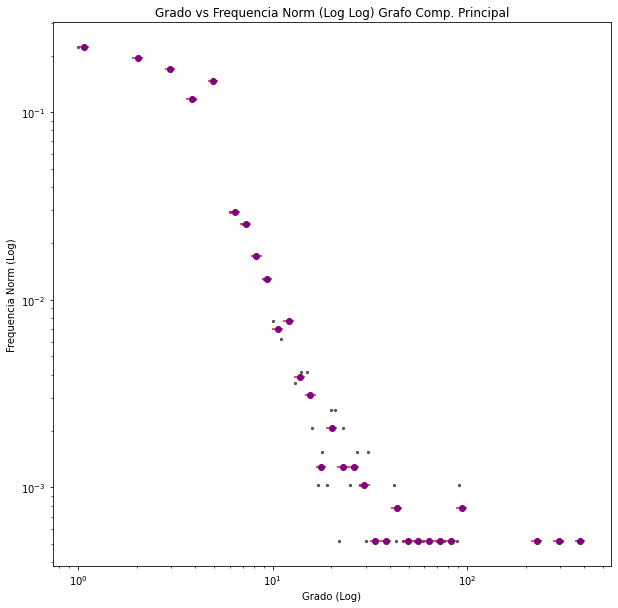

In [ ]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_freq_p,y_freq_normalizado_p, s=5, color='#555555')

s, edges, _ = binned_statistic(x_freq_p,y_freq_normalizado_p, statistic='mean', bins=np.logspace(0,np.exp(1)))

ax.hlines(s,edges[:-1],edges[1:], color="crimson", )


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_yscale("log")
ax.set_xscale("log")
plt.title("Grado vs Frequencia Norm (Log Log) Grafo Comp. Principal")
plt.xlabel("Grado (Log)")
plt.ylabel("Frequencia Norm (Log)")
plt.show()

Grafico de grado vs freq/prob generado desde un histograma (Componente Principal)

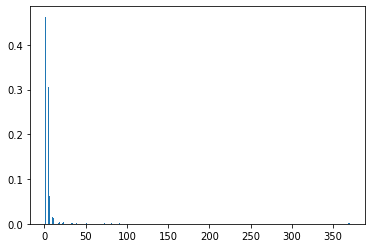

In [ ]:
values_hist_p = plt.hist(degree_dict_p.values(),bins='auto', density=True)
final_values_hist_p = []
for i in range(len(list(values_hist_p[0]))):
  final_values_hist_p.append((list(values_hist_p[1])[i],list(values_hist_p[0])[i]))

In [ ]:
x_hist_p = [val[0] for val in final_values_hist_p]
y_hist_p = [val[1] for val in final_values_hist_p]

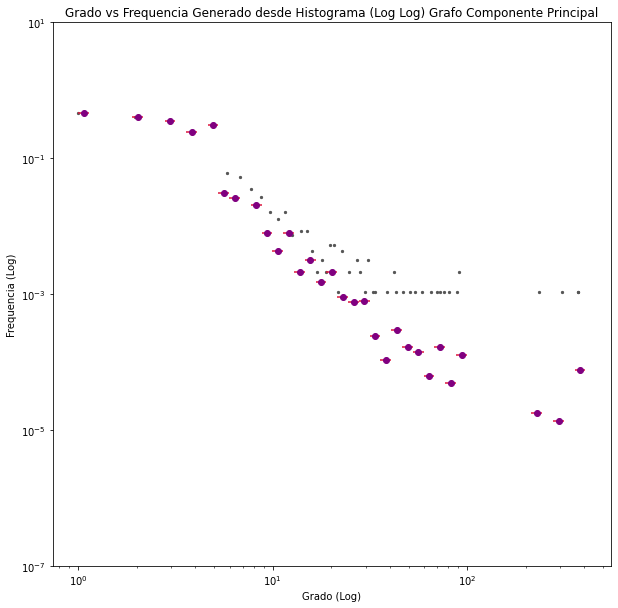

In [ ]:
import numpy as np
np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_hist_p,y_hist_p, s=5, color='#555555')

s, edges, _ = binned_statistic(x_hist_p,y_hist_p, statistic='mean', bins=np.logspace(0,np.exp(1)))

ax.hlines(s,edges[:-1],edges[1:], color="crimson", )


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_yscale("log")
ax.set_xscale("log")

plt.title("Grado vs Frequencia Generado desde Histograma (Log Log) Grafo Componente Principal")
plt.xlabel("Grado (Log)")
plt.ylabel("Frequencia (Log)")
plt.ylim(bottom=0.0000001, top=10)

plt.show()

Grado vs Coef. Clustering GCP

In [ ]:
x_avg_p = []
y_avg_p = []
avg_clustering_dict = {}
for node in giant_C.nodes():
  try:
    val = average_clustering(giant_C, giant_C[node])
    avg_clustering_dict[node] = val
    degree = giant_C.degree(node)
    x_avg_p.append(degree)
    y_avg_p.append(val)
  except:
    pass

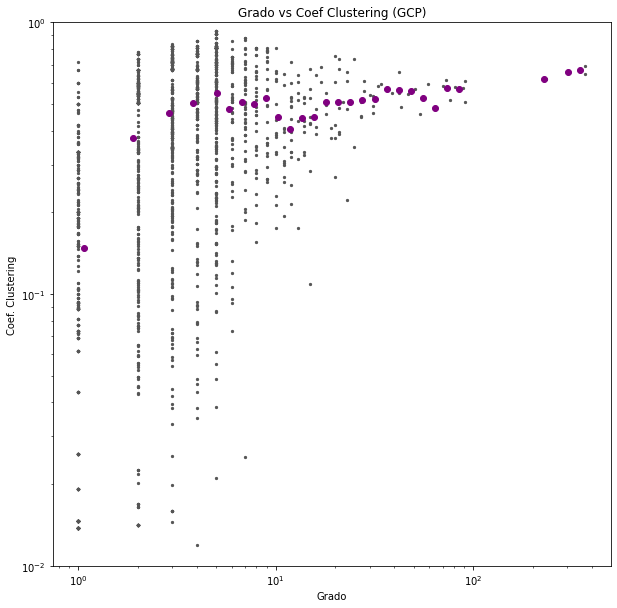

In [ ]:
import numpy as np; np.random.seed(42)
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_avg_p,y_avg_p, s=5, color='#555555')

s, edges, _ = binned_statistic(x_avg_p,y_avg_p, statistic='mean', bins=np.logspace(0,3,50))


ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="purple", zorder=3)

ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Grado vs Coef Clustering (GCP)")
plt.xlabel("Grado")
plt.ylabel("Coef. Clustering")
plt.ylim(bottom=0.01, top=1)

plt.show()

Veamos la componente principal del grafo

In [ ]:
organizations = pd.read_excel('excellimpioorg.xlsx')
organizations.head()
main_org = organizations['ORGANIZADOR'].to_list()

In [ ]:
protestas = pd.read_excel('datos_protestas.xlsx')

,Unnamed: 0,Unnamed: 0.1,medio,medio2,pa,p0,pb,p3,p3a,p4,p5a,p5b,p5c,p5d,p5e,p5f,p6,p7,p8,p9,p9a,p10,p10a,p11,p11a,p12,p13a,p13b,p13c,p13d,p13d_texto,p14a,p14b,p14c,p14d,p14e,p14f,p14g,p14h,p15a,...,p19c2,p19d1,p19d2,p19e1,p19e1_texto,p19e2,p20a,p20b,p21,p22a,p22b,p22c,p22d,p23,p24,p25,p26a,p26b,p26c,p26d,p26e,p26f,p27,p28a,p28b,p28c,p28d,p28e,p28f,p29a,p29b,p29c,p29d,p29e,p29f,p29f_texto,p5i,p5fi,latitud,longitud
0,0,0,LA PRENSA AUSTRAL,1,0,NaN,0,33,1.0,23.0,1,1,2009,NaN,NaN,NaN,13,131,13101,PLAZA ITALIA,1.0,.,NaN,NaN,NaN,4.0,8.0,19.0,NaN,NaN,.,1.0,2.0,2.0,1.0,2.0,2.0,2.0,.,GOBIERNO CENTRAL,...,NaN,NaN,NaN,NaN,.,NaN,DERECHOS HUMANOS,.,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,.,2009-01-01,NaT,-334500000.0,-706666667.0
1,1,1,LA ESTRELLA DE IQUIQUE,1,0,NaN,0,A28,1.0,93.0,2,1,2009,NaN,NaN,NaN,1,11,1101,UNAP,1.0,.,NaN,NaN,NaN,2.0,9.0,NaN,NaN,NaN,.,2.0,2.0,2.0,2.0,1.0,2.0,2.0,.,EDUCACIÓN,...,2.0,NaN,NaN,NaN,.,NaN,OTROS CONFLICTOS SOCIOECONOMICOS,GESTION ADMINISTRATIVA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0,NaN,NaN,NaN,NaN,.,2009-01-02,NaT,-202166667.0,-701666667.0
2,2,2,LA ESTRELLA DE IQUIQUE,1,0,NaN,0,A12,1.0,20.0,2,1,2009,NaN,NaN,NaN,1,11,1101,AFP PROVIDA,1.0,.,NaN,7.0,NaN,NaN,13.0,NaN,NaN,NaN,.,2.0,2.0,1.0,2.0,2.0,2.0,2.0,.,EMPRESARIAL,...,NaN,NaN,NaN,NaN,.,NaN,LABORAL/SALARIAL,.,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,10.0,NaN,NaN,NaN,NaN,.,2009-01-02,NaT,-202166667.0,-701666667.0
3,3,3,EL RANCAGUINO - DIARIO VI REGIÓN,1,0,NaN,0,2,1.0,40.0,2,1,2009,NaN,NaN,NaN,6,61,6101,.,1.0,NACIONAL,NaN,10.0,500.0,NaN,13.0,NaN,NaN,NaN,.,2.0,2.0,1.0,2.0,2.0,2.0,2.0,.,FINANCIERO,...,NaN,NaN,NaN,NaN,.,NaN,LABORAL/SALARIAL,.,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,.,2009-01-02,NaT,-341652778.0,-707397222.0
4,4,4,COMBINADOS,4,3,1.0,0,2,1.0,80.0,3,1,2009,NaN,NaN,NaN,9,91,9101,CERRO ï¿½ï¿½IELOL-PARQUE DEL SENDERO,1.0,.,2000.0,81.0,NaN,NaN,5.0,NaN,NaN,NaN,.,1.0,2.0,2.0,2.0,2.0,2.0,2.0,.,PODER JUDICIAL,...,NaN,NaN,NaN,NaN,.,NaN,SITUACION/MEDIDAS LEGALES,"IDENTIDAD, MEMORIA Y PATRIMONIO",1.0,2.0,2.0,2.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,NaN,NaN,.,2009-01-03,NaT,-387500000.0,-726666667.0


In [ ]:
list_protestas_org = protestas[['p17a','p17b','p17c','p17d','p17e','p17f','p18a']]
valores_enlistados = list_protestas_org.values.tolist()

In [ ]:
valores_enlistados

[['MAS', 'PALESTINOS', '.', '.', '.', '.', 'ORGANIZACIONES POLITICAS'],
 ['FEUNAP', '.', '.', '.', '.', '.', ' EDUCACIÓN'],
 ['SINDICATO DE TRABAJADORES AFP PROVIDA ',
  '.',
  '.',
  '.',
  '.',
  '.',
  'EMPRESARIAL'],
 ['TRABAJADORES BBVA Y PROVIDA', '.', '.', '.', '.', '.', 'FINANCIERO'],
 ['FAMILIARES DE MATIAS CATRILEO', '.', '.', '.', '.', '.', 'GRUPOS ETNICOS'],
 ['.', '.', '.', '.', '.', '.', 'GRUPOS IRREGULARES'],
 ['CAM', '.', '.', '.', '.', '.', 'GRUPOS ETNICOS'],
 ['FEDERACION DE ENTIDAD PALESTINAS EN CHILE',
  '.',
  '.',
  '.',
  '.',
  '.',
  'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL'],
 ['VECINOS DE LA REINA', '.', '.', '.', '.', '.', 'VECINAL/COMUNAL'],
 ['FAMILIARES DD.DD.',
  'FAMILIARES EJECUTADOS POLITICOS',
  '.',
  '.',
  '.',
  '.',
  'OTROS'],
 ['COMUNIDAD PALESTINA', '.', '.', '.', '.', '.', 'OTROS'],
 ['FEUTRAB', '.', '.', '.', '.', '.', 'TRANSPORTE'],
 ['CODEFF',
  'ACCION ECOLOGICA',
  '.',
  '.',
  '.',
  '.',
  'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL

In [ ]:
org_org = {}
for org in valores_enlistados:
  for value in org[:6]:
    if value!='.':
      if (value not in org_org):
        org_org[value] = {}
      else:
        if (org[6] not in org_org[value]):
          org_org[value][org[6]] = 1
        else:
          org_org[value][org[6]] += 1

In [ ]:
org_org

{'MAS': {' EDUCACIÓN': 1, 'GOBIERNO LOCAL': 1, 'ORGANIZACIONES POLITICAS': 2},
 'PALESTINOS': {},
 'FEUNAP': {' EDUCACIÓN': 41,
  'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL': 2,
  'OTROS': 1,
  'OTROS ACTORES ESTATALES': 1},
 'SINDICATO DE TRABAJADORES AFP PROVIDA ': {},
 'TRABAJADORES BBVA Y PROVIDA': {},
 'FAMILIARES DE MATIAS CATRILEO': {},
 'CAM': {'GRUPOS ETNICOS': 40, 'GRUPOS IRREGULARES': 6},
 'FEDERACION DE ENTIDAD PALESTINAS EN CHILE': {},
 'VECINOS DE LA REINA': {'VECINAL/COMUNAL': 5},
 'FAMILIARES DD.DD.': {'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL': 3,
  'OTROS': 2},
 'FAMILIARES EJECUTADOS POLITICOS': {'OTROS': 1},
 'COMUNIDAD PALESTINA': {},
 'FEUTRAB': {},
 'CODEFF': {'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL': 1},
 'ACCION ECOLOGICA': {' EDUCACIÓN': 1,
  'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL': 9},
 'PC': {' EDUCACIÓN': 3,
  '.': 1,
  'GRUPOS ETNICOS': 1,
  'ORGANIZACIONES POLITICAS': 19,
  'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL': 26,
  'OTROS ACTORES ESTATALE

In [ ]:
import operator
causas = []
for value in main_org:
  try:
    causas.append(max(org_org[value], key=lambda k: org_org[value][k]))
  except:
    causas.append('INDEFINIDO')


In [ ]:
len(causas)

9361

In [ ]:
list_organizations = organizations['ORGANIZADOR'].to_list()

In [ ]:
edges_giant = giant_C.nodes(data=True)

In [ ]:
u = 0
dict_atrib = {}
for value in causas:
  dict_atrib[f'o{u}'] = {"causa": value}
  u +=1

In [ ]:
nx.set_node_attributes(giant_C, dict_atrib)

In [ ]:
nodes_giant = giant_C.nodes(data=True)

In [ ]:
nodes_giant

NodeDataView({'o5584': {'bipartite': 0, 'causa': 'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL'}, 'o9244': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o8529': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o659': {'bipartite': 0, 'causa': ' EDUCACIÓN'}, 'o3222': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o178': {'bipartite': 0, 'causa': ' EDUCACIÓN'}, 'o3241': {'bipartite': 0, 'causa': ' EDUCACIÓN'}, 'o5848': {'bipartite': 0, 'causa': 'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL'}, 'o3655': {'bipartite': 0, 'causa': ' EDUCACIÓN'}, 'o1610': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o5410': {'bipartite': 0, 'causa': ' EDUCACIÓN'}, 'o8953': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o1576': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o8335': {'bipartite': 0, 'causa': 'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL'}, 'o287': {'bipartite': 0, 'causa': 'OTROS ACTORES ESTATALES'}, 'o5414': {'bipartite': 0, 'causa': ' EDUCACIÓN'}, 'o8455': {'bipartite': 0, 'causa': 'INDEFINIDO'}, 'o1883': {'bipartite': 0, 'causa'

In [ ]:
from networkx.readwrite import json_graph
import json

In [ ]:
nx.write_gexf(giant_C, "graph_movilizaciones1.gexf")

In [ ]:
!pip install python-louvain


In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = community_louvain.best_partition(giant_C)

pos = nx.spring_layout(giant_C)
pos

{'o5584': array([-0.0514824 , -0.28076753]),
 'o9244': array([-0.11754962,  0.47316831]),
 'o8529': array([-0.35522532,  0.00130297]),
 'o659': array([-0.17998715, -0.11983654]),
 'o3222': array([-0.01067851, -0.17733395]),
 'o178': array([0.03635348, 0.08551411]),
 'o3241': array([-0.1864505 , -0.19754647]),
 'o5848': array([0.07459777, 0.1816557 ]),
 'o3655': array([ 0.2365163, -0.0331081]),
 'o1610': array([-0.14621145,  0.1406602 ]),
 'o5410': array([ 0.30373067, -0.28240564]),
 'o8953': array([-0.7180829 ,  0.42589849]),
 'o1576': array([-0.13527128,  0.19730729]),
 'o8335': array([-0.1378828 ,  0.05245305]),
 'o287': array([-0.3024736 ,  0.11885763]),
 'o5414': array([ 0.09388252, -0.45257568]),
 'o8455': array([ 0.1135729, -0.0319765]),
 'o1883': array([ 0.07864984, -0.0297958 ]),
 'o2846': array([-0.16884467, -0.05050674]),
 'o5075': array([ 0.09629813, -0.01511444]),
 'o3968': array([ 0.13140063, -0.05910229]),
 'o7778': array([-0.00285076, -0.19366977]),
 'o2917': array([0.13

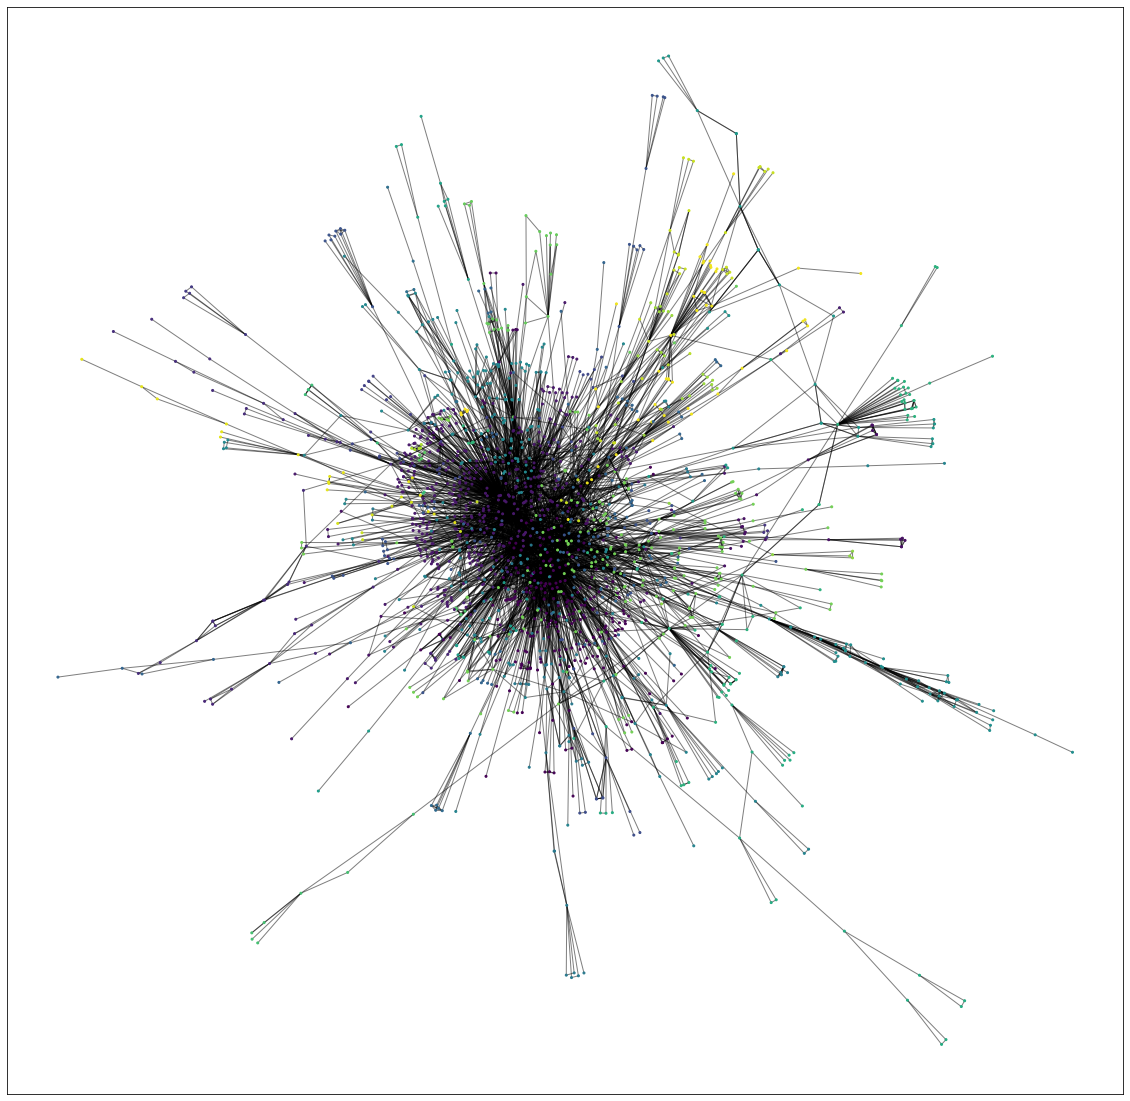

In [ ]:
plt.figure(figsize=(20,20))

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(giant_C, pos, partition.keys(), node_size=4,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(giant_C, pos, alpha=0.5)
plt.show()

In [ ]:
new_dict_partition = {}
for value in partition.keys():
  new_dict_partition[value] = {"class": partition[value]}


new_dict_partition

{'o5584': {'class': 0},
 'o9244': {'class': 1},
 'o8529': {'class': 19},
 'o659': {'class': 3},
 'o3222': {'class': 15},
 'o178': {'class': 15},
 'o3241': {'class': 5},
 'o5848': {'class': 40},
 'o3655': {'class': 7},
 'o1610': {'class': 3},
 'o5410': {'class': 0},
 'o8953': {'class': 8},
 'o1576': {'class': 9},
 'o8335': {'class': 3},
 'o287': {'class': 10},
 'o5414': {'class': 11},
 'o8455': {'class': 0},
 'o1883': {'class': 12},
 'o2846': {'class': 3},
 'o5075': {'class': 12},
 'o3968': {'class': 37},
 'o7778': {'class': 0},
 'o2917': {'class': 15},
 'o1311': {'class': 3},
 'o2835': {'class': 0},
 'o5896': {'class': 37},
 'o6782': {'class': 0},
 'o8543': {'class': 0},
 'o102': {'class': 0},
 'o7609': {'class': 0},
 'o3423': {'class': 22},
 'o156': {'class': 37},
 'o8463': {'class': 15},
 'o5952': {'class': 16},
 'o7252': {'class': 17},
 'o3300': {'class': 15},
 'o4163': {'class': 0},
 'o7141': {'class': 18},
 'o6963': {'class': 15},
 'o6696': {'class': 3},
 'o5317': {'class': 19},
 

In [ ]:
nx.set_node_attributes(giant_C, new_dict_partition)

In [ ]:
nodes_giant = giant_C.nodes(data=True)
nodes_giant

NodeDataView({'o5584': {'bipartite': 0, 'causa': 'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL', 'class': 0}, 'o9244': {'bipartite': 0, 'causa': 'INDEFINIDO', 'class': 1}, 'o8529': {'bipartite': 0, 'causa': 'INDEFINIDO', 'class': 19}, 'o659': {'bipartite': 0, 'causa': ' EDUCACIÓN', 'class': 3}, 'o3222': {'bipartite': 0, 'causa': 'INDEFINIDO', 'class': 15}, 'o178': {'bipartite': 0, 'causa': ' EDUCACIÓN', 'class': 15}, 'o3241': {'bipartite': 0, 'causa': ' EDUCACIÓN', 'class': 5}, 'o5848': {'bipartite': 0, 'causa': 'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL', 'class': 40}, 'o3655': {'bipartite': 0, 'causa': ' EDUCACIÓN', 'class': 7}, 'o1610': {'bipartite': 0, 'causa': 'INDEFINIDO', 'class': 3}, 'o5410': {'bipartite': 0, 'causa': ' EDUCACIÓN', 'class': 0}, 'o8953': {'bipartite': 0, 'causa': 'INDEFINIDO', 'class': 8}, 'o1576': {'bipartite': 0, 'causa': 'INDEFINIDO', 'class': 9}, 'o8335': {'bipartite': 0, 'causa': 'OTRAS ORGANIZACIONES DE LA SOCIEDAD CIVIL', 'class': 3}, 'o287': {'bipartite': 0

In [ ]:
nx.write_gexf(giant_C, "graph_movilizaciones_class.gexf")

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools

In [ ]:
comp = girvan_newman(giant_C)
k=20

In [ ]:
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))  

(['o0', 'o1', 'o100', 'o1004', 'o1005', 'o101', 'o1016', 'o1017', 'o102', 'o1028', 'o1033', 'o1034', 'o1039', 'o1040', 'o1041', 'o1057', 'o1059', 'o106', 'o1060', 'o107', 'o1071', 'o1073', 'o1075', 'o1078', 'o1084', 'o1089', 'o1096', 'o110', 'o1101', 'o1102', 'o1103', 'o1105', 'o1106', 'o1107', 'o1109', 'o111', 'o1110', 'o1116', 'o1117', 'o1118', 'o112', 'o1120', 'o1124', 'o1129', 'o1132', 'o1140', 'o1145', 'o1149', 'o1153', 'o1170', 'o1171', 'o1172', 'o1177', 'o1178', 'o1179', 'o1180', 'o1203', 'o1218', 'o1221', 'o1228', 'o1229', 'o1239', 'o1242', 'o1243', 'o1247', 'o1251', 'o1259', 'o1262', 'o1264', 'o1269', 'o1270', 'o1271', 'o1272', 'o1277', 'o1288', 'o1293', 'o1294', 'o1295', 'o1296', 'o13', 'o1307', 'o1308', 'o1309', 'o1310', 'o1311', 'o1313', 'o1314', 'o1325', 'o1326', 'o1328', 'o133', 'o1332', 'o1339', 'o134', 'o1340', 'o1342', 'o1343', 'o1345', 'o1347', 'o136', 'o1361', 'o1368', 'o137', 'o1372', 'o1373', 'o1374', 'o138', 'o1381', 'o1387', 'o139', 'o1390', 'o1396', 'o1398', 'o1

KeyboardInterrupt: ignored